In [2]:
import pandas as pd
# Function to load the dataset
def load_data(file_name):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_name)
    # Display the first 5 rows
    print("First 5 rows of the dataset:")
    print(data.head())
    return data

# Function to handle missing values
def handle_missing_values(df):
    # Check for missing values in the Concentration column
    print("\nMissing values in 'Concentration' column:")
    print(df['Concentration'].isnull().sum())

    # Fill missing values with median of each Metabolite and Condition group
    df['Concentration'] = df.groupby(['Metabolite', 'Condition'])['Concentration'].transform(lambda x: x.fillna(x.median()))
    return df

# Function to standardize units (convert mM to μM)
def standardize_units(df):
    # Define a helper function
    def convert(row):
        if row['Units'] == 'mM':
            row['Concentration'] = row['Concentration'] * 1000
            row['Units'] = 'μM'
        return row

    # Apply the function to each row
    df = df.apply(convert, axis=1)
    return df

# Function to handle outliers___i looked this one from chatgpt :)
def handle_outliers(df):
    # Function to replace outliers with median of the group
    def replace_outliers(group):
        q1 = group['Concentration'].quantile(0.25)
        q3 = group['Concentration'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        median = group['Concentration'].median()
        group['Concentration'] = group['Concentration'].apply(
            lambda x: median if x < lower or x > upper else x
        )
        return group

    # Apply the function to each Metabolite and Condition group
    df = df.groupby(['Metabolite', 'Condition']).apply(replace_outliers)
    df.reset_index(drop=True, inplace=True)  # Reset index after groupby
    return df

# Function to calculate summary statistics
def calculate_statistics(df):
    print("\nSummary Statistics:")
    stats = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(['mean', 'median', 'std'])
    print(stats)

# Function to group and aggregate data
def group_and_aggregate(df):
    print("\nMean Concentration by Metabolite and Condition:")
    result = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean()
    print(result)

# Main program to run everything
file_name = 'metabolic_dataset.csv'
data = load_data(file_name)
data = handle_missing_values(data)
data = standardize_units(data)
data = handle_outliers(data)
calculate_statistics(data)
group_and_aggregate(data)


First 5 rows of the dataset:
    Metabolite Condition  Replicate  Concentration Units
0  Metabolite1   Control          1      80.281301    μM
1  Metabolite1   Control          2      84.658008    μM
2  Metabolite1   Control          3      75.872092    μM
3  Metabolite1   Control          4      75.872174    μM
4  Metabolite1   Control          5      84.938922    μM

Missing values in 'Concentration' column:
5

Summary Statistics:
                              mean      median        std
Metabolite   Condition                                   
Metabolite1  Control     80.324499   80.281301   4.464336
             Treatment   74.719990   74.719990   0.004087
Metabolite10 Control     62.371444   62.048568   0.659852
             Treatment   82.186189   82.007579   0.906722
Metabolite2  Control     47.547589   47.547589   0.796456
             Treatment   49.955735   50.356504   6.000106
Metabolite3  Control     20.091708   19.783831   0.691423
             Treatment   43.169796   42.7

C:\Users\BISMILLAH\AppData\Local\Temp\ipykernel_6536\478184898.py:51: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



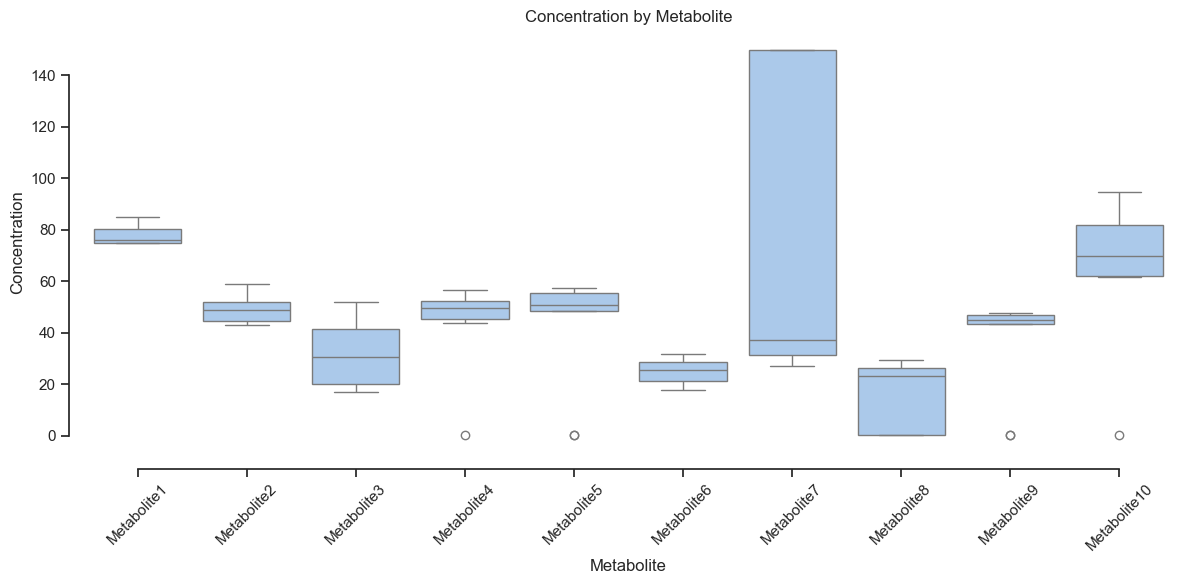

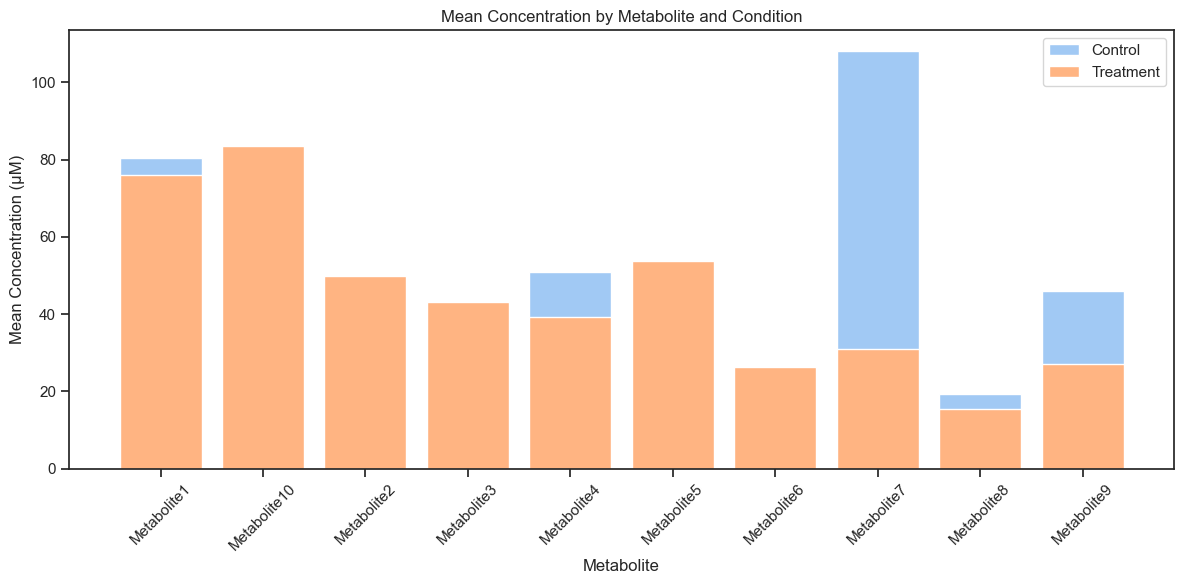

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
#Function for box plot by using seaborn
def box_plot_sns(df, output_file):
    sns.set_theme(style="ticks", palette="pastel")
    plt.figure(figsize=(12, 6)) #Set size
    sns.boxplot(x="Metabolite", y="Concentration", data=df)
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45) #Rotate to show all on x-axis
    plt.title("Concentration by Metabolite")
    plt.tight_layout() 
    plt.show()
    
    # Save plot to file
    #plt.savefig(output_file,dpi=300) #comment either show or save 
    plt.close()  # Close the figure to avoid re-drawing in Jupyter

def bar_plot_plt(df, output_file):
    # Step 1: Group by Metabolite and Condition, and calculate mean
    grouped = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().reset_index()

    # Step 2: Make the plot
    plt.figure(figsize=(12, 6))

    # Create bar plot with color per condition
    for condition in grouped['Condition'].unique():
        subset = grouped[grouped['Condition'] == condition]
        plt.bar(subset['Metabolite'], subset['Concentration'], label=condition)

    # Step 3: Add labels and title
    plt.xlabel("Metabolite")
    plt.ylabel("Mean Concentration (μM)")
    plt.title("Mean Concentration by Metabolite and Condition")
    plt.xticks(rotation=45)
    plt.legend()

    # Step 4: Show the plot
    plt.tight_layout()
    plt.show()
    #plt.savefig(output_file, dpi=300)
    


def line_plot_px(df, metabolite_name, output_file):
    # Filter the data for the specific metabolite
    subset = df[df['Metabolite'] == metabolite_name]
    # Sort by Replicate for proper line flow
    subset = subset.sort_values(by='Replicate')
    # Create the interactive line plot
    fig = px.line(subset,
                  x='Replicate',
                  y='Concentration',
                  color='Condition',
                  markers=True,
                  title=f"Concentration Trend Across Replicates for {metabolite_name}")

    # Save to HTML file (no display)
    fig.write_html(output_file)


    
    
    
df = pd.read_csv("metabolic_dataset.csv")
box_plot_sns(df,"meta_boxplot_sns.png")
bar_plot_plt(df,"meta_barplot_plt.png")
line_plot_px(df,'Metabolite1',"Line_plot.html")